# core

> Fill in a module description here

In [67]:
#| default_exp core

In [68]:
#| hide
from nbdev.showdoc import *

In [69]:
#| export
import matplotlib.pyplot as plt
from sympy import *
import sympy

class Graph_free_market:
    def __init__(self) -> None:
        pass
        
    
    def __str__(self):
        return str(self.__class__) + ": " + str(self.__dict__)
        

    def market_graph(self, supply: str, demand: str, start: int, end: int, step: int, complete = False) -> None:
        price = self.get_price(supply, demand)
        quantity = self.get_quantity(supply, demand)

        supply = self.get_calculate_values(supply, start, end, step)
        demand = self.get_calculate_values(demand, start, end, step)

        if complete == True:
            plt.plot([i for i in range(0, round(quantity) + 1)], [price for i in range(0, round(quantity) + 1)],
                     linestyle = "dashed", label = f"Price*: {price}")
            plt.plot([quantity for i in range(0, round(price) + 1 )], [i for i in range(0,round(price) + 1)],
                     linestyle = "dashed", label = f"Quantity*: {quantity}")


     
        plt.plot(supply.keys(),supply.values(), label = "Supply") 
        plt.plot(demand.keys(),demand.values(), label = "Demand") 

        

        plt.xlabel("Quantity")
        plt.ylabel("Price")

        plt.legend() 
        plt.show()


    def get_calculate_values(self, expression: str, start: int, end: int, step: int) -> dict:
        #from sympy import symbols, parse_expr,solve, Eq
        value_pairs = {}
        equation_function = self.create_equation_function(expression)
        if equation_function:
            x_values = [i for i in range(start, end, step)]
            for x_val in x_values:
                result = equation_function(x_val)
                value_pairs[x_val] = result
                
               # print(f"For x = {x_val}, the result is {result}")

        else:
            print("Error: Unable to create the equation function.")
        return value_pairs


    def create_equation_function(self, equation_str: str) -> str:
        x = symbols('x')
        
        try:
            equation = parse_expr(equation_str)
            equation_function = lambda x_val: equation.subs(x, x_val)
            return equation_function
        except Exception as e:
            return None


    def get_quantity(self, supply: str, demand: str) -> float:
        x = symbols('x')
        
        # Create the equation from the supply and demand functions
        supply_eq = parse_expr(supply)
        demand_eq = parse_expr(demand)
        
        # Calculate the equilibrium price and quantity
        quantity = max(solve(Eq(supply_eq, demand_eq), x))
        return round(quantity)
    

    def get_price(self, supply: str, demand: str) -> float:
        x, y = symbols('x y')
        
        # Create the equation from the supply and demand functions
        supply_eq = parse_expr(supply)
        demand_eq = parse_expr(demand)
        
        print(supply_eq, demand_eq)

        inverse_supply = solve(supply_eq - y, x)[0]
        inverse_demand = solve(demand_eq - y, x)[0]
        

        price = max(solve(Eq(inverse_supply, inverse_demand), y))
        
        return round(price)

        
    def get_consumer_surplus(self, supply: str, demand: str) -> float:
        x, y = symbols('x y')
        
        # Create the equation from the supply and demand functions
        supply_eq = parse_expr(supply)
        demand_eq = parse_expr(demand)
        
        # Calculate the equilibrium price and quantity
        price = self.get_price(supply, demand)
        quantity = self.get_quantity(supply, demand)
        
        # Define the inverse demand function (price as a function of quantity)
        consumer_surplus = parse_expr(f"{demand}-{price}")
        
        # Calculate consumer surplus
        surplus = sympy.integrate(consumer_surplus, (x, 0, quantity)) 
        
        return round(surplus)
    

    def get_producer_surplus(self, supply: str, demand: str) -> float:
        x, y = symbols('x y')
        
        # Create the equation from the supply and demand functions
        supply_eq = parse_expr(supply)
        demand_eq = parse_expr(demand)
        
        # Calculate the equilibrium price and quantity
        price = self.get_price(supply, demand)
        quantity = self.get_quantity(supply, demand)
        
        # Define the inverse demand function (price as a function of quantity)
        inverse_supply = solve(supply_eq - y, x)[0]

        producer_surplus = parse_expr(f"{quantity}-{inverse_supply}")
        
        # Calculate consumer surplus
        surplus = sympy.integrate(producer_surplus, (y, 0, price)) 
        
        return round(surplus)


    def get_economic_surplus(self, supply: str, demand: str) -> float:
        consumer = self.get_consumer_surplus(supply, demand)
        producer = self.get_producer_surplus(supply, demand)
        economic_surplus = consumer + producer
        return economic_surplus

In [83]:
#| export
import matplotlib.pyplot as plt
from sympy import *
import sympy
class Graph_monopoly(Graph_free_market):
    def __init__(self) -> None:
        super().__init__()
    
    def market_graph(self, supply: str, demand: str, start: int, end: int, step: int, complete = False, is_tot_cost = False) -> None:
        x = symbols('x')
        supply_parsed = parse_expr(supply)
        demand_parsed = parse_expr(demand)
        if is_tot_cost == True:
            marginal_cost = diff(supply_parsed, x)
        else:
            marginal_cost = supply
            
            

        marginal_revenue = diff(demand_parsed, x)
        
        
        print(f"{marginal_cost, type(marginal_cost)}\n{marginal_revenue, type(marginal_revenue)}")
        supply, demand = str(marginal_cost), str(marginal_revenue)
        
        print("x" in supply)
        print("x" in demand)
        
        if "x" not in supply and "x" not in demand:
            print("Error, no equilibrium or infinite equilibriums")
            return None
        elif "x" not in str(supply):
            price = float(supply)
            print(price, demand)
            quantity = solve(Eq(parse_expr(price),demand), x)
            print(quantity)
            #quantity = solve(Eq(demand, price), x)
            plt.axvline(x = quantity, label="Supply")
        elif "x" not in str(demand):
            price = float(demand)
            quantity = solve(Eq(parse_expr(f"{supply}-{price}"), 0), x)
            plt.axhline(x = quantity, label="Demand")
        else:
            price = self.get_price(supply, demand)
            quantity = self.get_quantity(supply, demand)
            
        supply_dct = self.get_calculate_values(supply, start, end, step)
        demand_dct = self.get_calculate_values(demand, start, end, step)

        if complete == True:
            plt.plot([i for i in range(0, round(quantity) + 1)], [price for i in range(0, round(quantity) + 1)],
                     linestyle = "dashed", label = f"Price*: {price}")
            plt.plot([quantity for i in range(0, round(price) + 1 )], [i for i in range(0,round(price) + 1)],
                     linestyle = "dashed", label = f"Quantity*: {quantity}")

        if "x" in str(supply):
            plt.plot(supply_dct.keys(),supply_dct.values(), label = "Supply") 
        if "x" in str(demand):
            plt.plot(demand_dct.keys(),demand_dct.values(), label = "Demand") 

        plt.xlabel("Quantity")
        plt.ylabel("Price")

        plt.legend() 
        plt.show()        


In [84]:
graph = Graph_monopoly()
supply = "x * 2"
demand = "50 * x - 3 * x**2"
graph.market_graph(supply, demand,0, 12, 1, complete=True, is_tot_cost = True)

(2, <class 'sympy.core.numbers.Integer'>)
(50 - 6*x, <class 'sympy.core.add.Add'>)
False
True
2.0 50 - 6*x


AttributeError: 'float' object has no attribute 'strip'

In [ ]:
graph = Graph_free_market()
supply_function = " x*2"
demand_function = "1000 -  3*x**2"

In [ ]:


consumer_surplus = graph.get_consumer_surplus(supply_function, demand_function)
print("Consumer Surplus:", consumer_surplus)

producer_surplus = graph.get_producer_surplus(supply_function, demand_function)
print("Producer Surplus:", producer_surplus)

economic_surplus = graph.get_economic_surplus(supply_function, demand_function)

print("Economic Surplus:", economic_surplus)


2*x 1000 - 3*x**2
Consumer Surplus: 12834
2*x 1000 - 3*x**2
Producer Surplus: -1008
2*x 1000 - 3*x**2
2*x 1000 - 3*x**2
Economic Surplus: 11826


2*x 1000 - 3*x**2


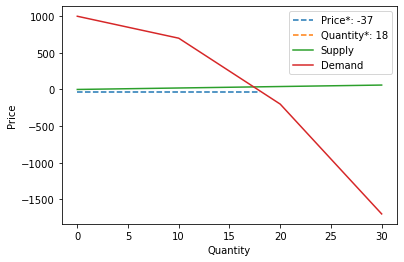

In [ ]:
# find inverse of the supply and demand and then calculate the price
graph.market_graph(supply_function, demand_function,0, 40, 10, complete=True)

In [ ]:
price = graph.get_price(supply_function, demand_function)
quantity = graph.get_quantity(supply_function, demand_function)
print(f"Price: {price}, Quantity: {quantity}")

2*x 1000 - 3*x**2
Price: -37, Quantity: 18


In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()